In [1]:
!pip install ewl

In [2]:
from ewl import *

In [3]:
psi = (ket('00') + i * ket('11')) / sqrt(2)  # initial state

alice = U(theta=pi/2, alpha=pi/2, beta=0)  # quantum strategy
bob = U(theta=0, alpha=0, beta=0)  # classical strategy (C)

ewl = ExtendedEWL(psi, [alice, bob])

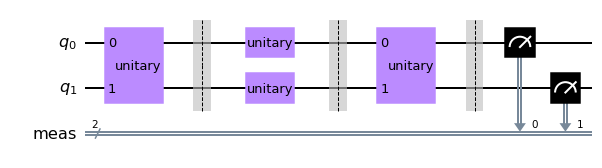

In [4]:
ewl.draw()

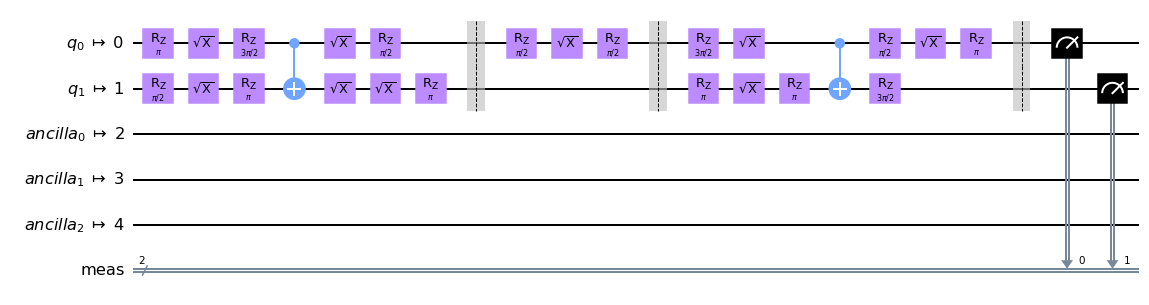

In [5]:
ewl.draw_transpiled(backend_name='ibmq_athens', optimization_level=3)

{'11': 500, '01': 524}


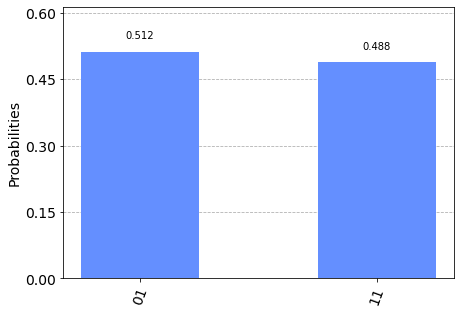

In [6]:
counts_simulated = ewl.simulate()
print(counts_simulated)
plot_histogram(counts_simulated)

Job Status: job has successfully run
{'00': 42, '01': 589, '10': 19, '11': 374}


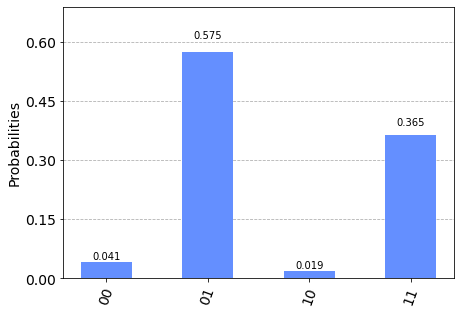

In [7]:
counts_quantum = ewl.run()
print(counts_quantum)
plot_histogram(counts_quantum)

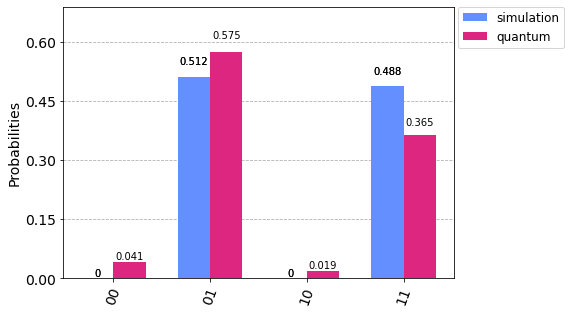

In [8]:
plot_histogram(data=[counts_simulated, counts_quantum], legend=['simulation', 'quantum'])